## 1. Collect the data

In [1]:
# Import the libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 1.1 Load the data

In [2]:
# Load the dataset
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Drop the id column
iris_data = iris_data.drop("Id", axis=1)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.2 Preprocess the Data

In [4]:
# Rename the columns for easier reading
iris_data = iris_data.rename(columns={'SepalLengthCm': 'Sepal Length', 
                  'SepalWidthCm': 'Sepal Width', 
                  'PetalLengthCm': 'Petal Length', 'PetalWidthCm': 'Petal Width'})
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Remove missing values
iris_data.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

In [6]:
# Check for duplicated values
print("Number of duplicates: ", iris_data.duplicated().sum())

Number of duplicates:  3


In [7]:
# Drop the duplicates
iris_data = iris_data.drop_duplicates()
iris_data.sort_index(axis=1)
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.3 Data Transformation

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


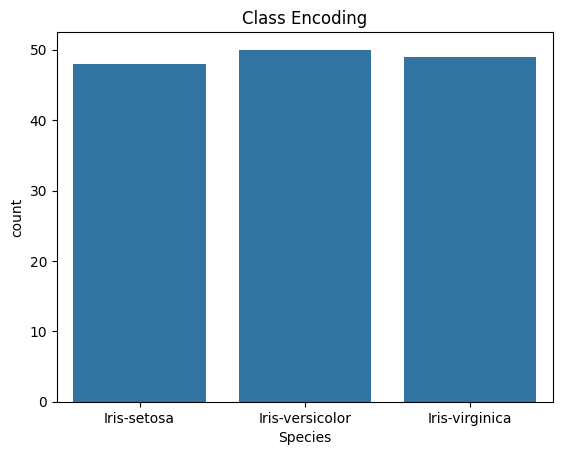

In [8]:
# Manually encode the class columns
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(iris_data['Species'].value_counts())
sns.countplot(x=iris_data['Species'])
plt.title("Class Encoding")
plt.savefig("Class Encoding.png")
plt.show()

In [9]:
# Manual label encoding
y = iris_data['Species']
n_y = []

for i in y:
    n_y.append(labels.index(i))

iris_data['Species'] = n_y

C:\Users\HAMO\AppData\Local\Temp\ipykernel_11044\1804997436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data['Species'] = n_y


In [10]:
iris_data['Species'].value_counts()

Species
1    50
2    49
0    48
Name: count, dtype: int64

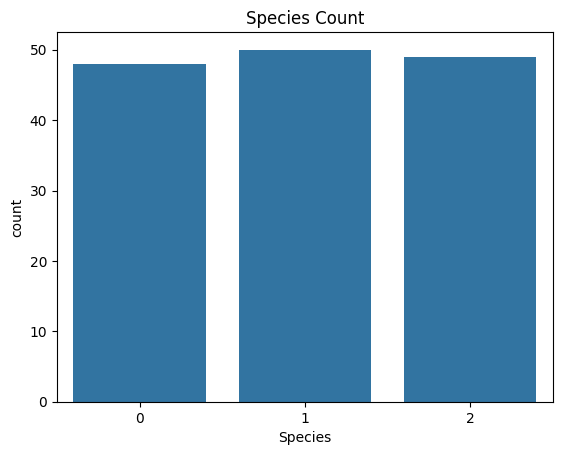

In [11]:
sns.countplot(x=iris_data['Species'])
plt.title("Species Count")
plt.savefig("Species Count.png")
plt.show()

## 2. Data Visualization

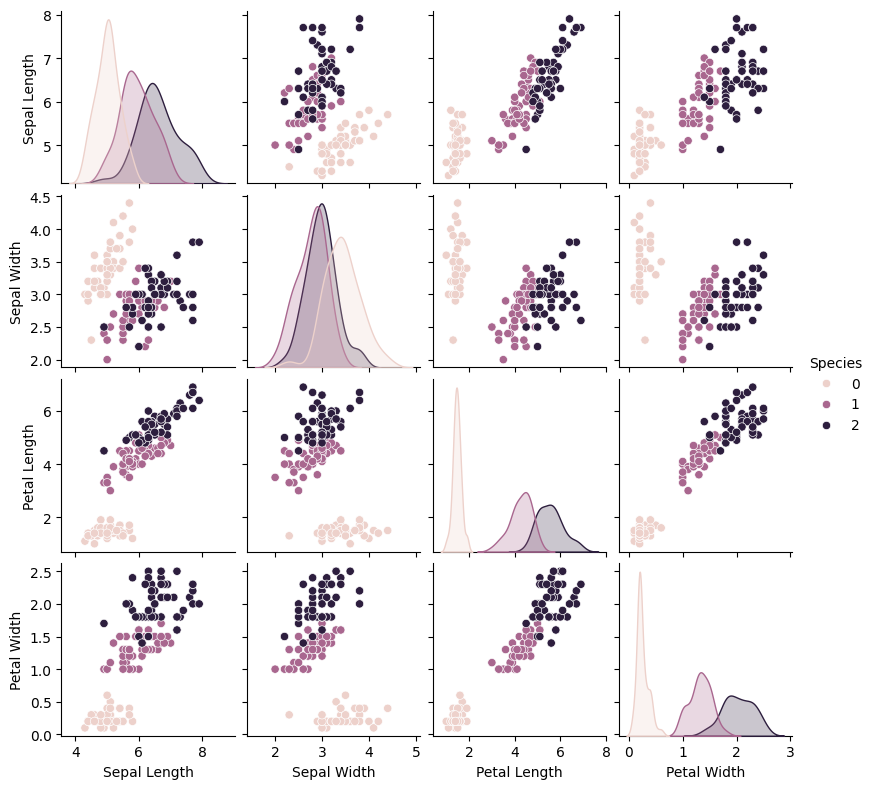

In [12]:
# Represent the data using a pairplot to compare different columns
sns.pairplot(iris_data, 
             hue="Species",
             height=2,
             diag_kind="kde")
plt.savefig("Iris Pairplot.png")
plt.show()

## 3. Data Preparation

In [13]:
# Split the data into features and labels
X, y = iris_data.drop("Species", axis=1), iris_data["Species"]
X.shape, y.shape

((147, 4), (147,))

## 4. Model Building

### 4.1 K-Means Clustering

In [14]:
# Create and train the K-Means model
iris_model = KMeans(n_clusters=5, random_state=42)
y_pred = iris_model.fit_predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 4, 1, 1, 4, 0, 4, 1, 4, 1, 1,
       1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 4, 3, 1, 4, 3, 3, 1, 4, 4, 4, 1, 3,
       3, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3])

In [15]:
# Check the centroids created by the model
iris_model.cluster_centers_

array([[5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [6.21842105, 2.85789474, 4.73684211, 1.55526316],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

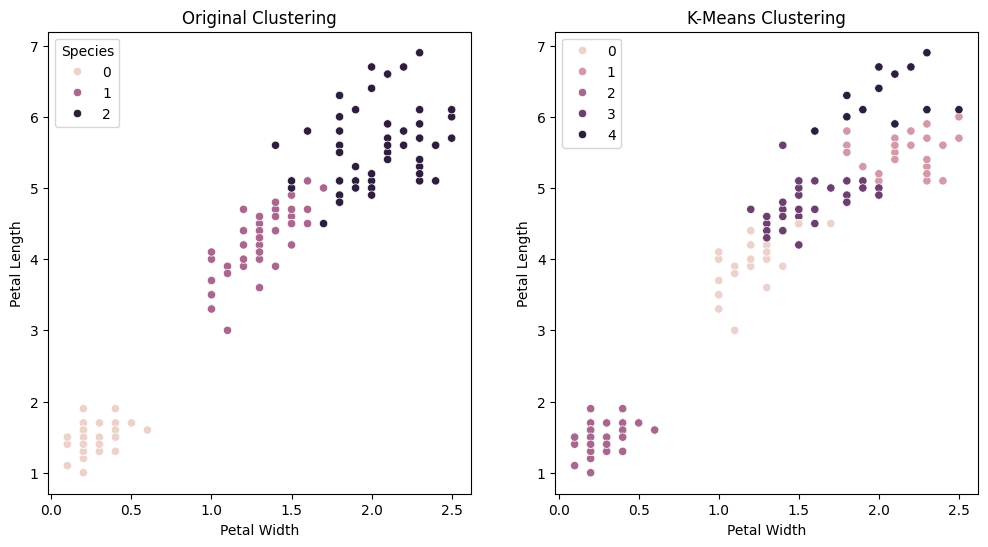

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Clustering")
sns.scatterplot(x=X["Petal Width"], y=X["Petal Length"],
                hue=y)

plt.subplot(1,2,2)
plt.title("K-Means Clustering")
sns.scatterplot(x=X["Petal Width"], y=X["Petal Length"],
                hue=y_pred)
plt.savefig("Original vs K-Means Clustering.png")
plt.show()

### 4.2 Optimum Cluster Number

In [17]:
# Use the elbow curve to obtain the optimal number of clusters
error = []

for i in range(1, 11):
    iris_model = KMeans(n_clusters=i).fit(X)
    iris_model.fit(X)
    error.append(iris_model.inertia_)

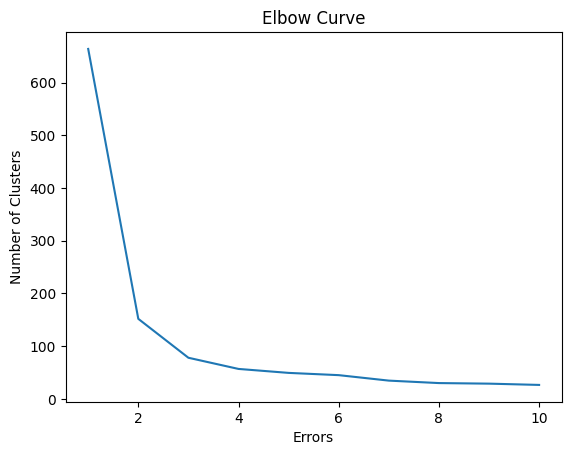

In [18]:
# Plot the elbow curve
plt.plot(range(1, 11), error)
plt.title("Elbow Curve")
plt.xlabel("Errors")
plt.ylabel("Number of Clusters")
plt.savefig("ElbowCurve.png")
plt.show()

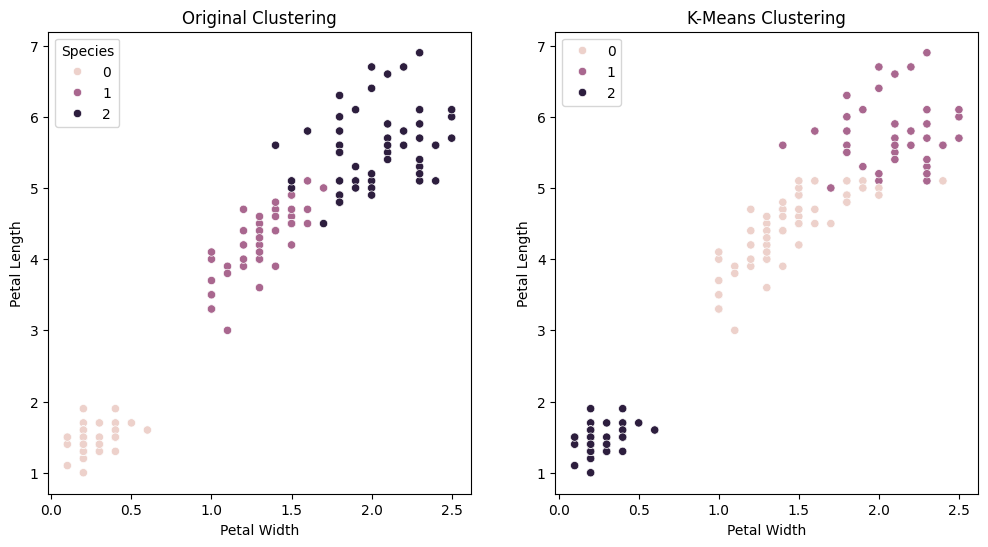

In [19]:
# Plot the original and K-Means graphs using the optimal number of clusters (3 in this case)
iris_model = KMeans(n_clusters=3, random_state=42)
y_pred = iris_model.fit_predict(X)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Clustering")
sns.scatterplot(x=X["Petal Width"], y=X["Petal Length"],
         hue=y)

plt.subplot(1,2,2)
plt.title("K-Means Clustering")
sns.scatterplot(x=X["Petal Width"], y=X["Petal Length"],
         hue=y_pred)
plt.savefig("Original vs K-Means Clustering 2.png")
plt.show()

In [20]:
# Check the differences between the two graphs
print("Original cluster count: ", y.value_counts(), sep="\n", end="\n\n")
print("K-Means cluster count: ", pd.Series(y_pred).value_counts(), sep="\n", end="\n\n")

Original cluster count: 
Species
1    50
2    49
0    48
Name: count, dtype: int64

K-Means cluster count: 
0    60
2    48
1    39
Name: count, dtype: int64

